<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')

#### Check the number of rows and columns.

In [3]:
print('The number of rows are ' + str(movies.shape[0]) + ', and columns are ' + str(movies.shape[1]) + '.')

The number of rows are 979, and columns are 6.


#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
moviesSortedShortToLong = movies.sort_values('duration', ascending=True)
print('The Top 5 Shortest Movies are:')
print(moviesSortedShortToLong[['title', 'duration']].head()) # Prints the 5 shortest movies
print('')
print('The Top 5 Longest Movies are:')
print(moviesSortedShortToLong[['title', 'duration']].tail()[::-1]) # Prints the 5 longest movies

The Top 5 Shortest Movies are:
                           title  duration
389                       Freaks        64
338          Battleship Potemkin        66
258  The Cabinet of Dr. Caligari        67
293                    Duck Soup        68
88                       The Kid        68

The Top 5 Longest Movies are:
                                 title  duration
476                             Hamlet       242
157                 Gone with the Wind       238
78         Once Upon a Time in America       229
142  Lagaan: Once Upon a Time in India       224
445               The Ten Commandments       220


#### Create a histogram of duration, choosing an "appropriate" number of bins.

(array([  7.,  18.,  54., 114., 149., 152., 143., 116.,  76.,  35.,  37.,
         29.,  16.,  11.,  10.,   4.,   2.,   3.,   1.,   2.]),
 array([ 64. ,  72.9,  81.8,  90.7,  99.6, 108.5, 117.4, 126.3, 135.2,
        144.1, 153. , 161.9, 170.8, 179.7, 188.6, 197.5, 206.4, 215.3,
        224.2, 233.1, 242. ]),
 <a list of 20 Patch objects>)

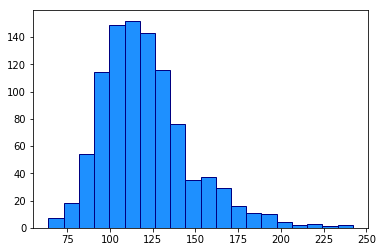

In [7]:
plt.hist(movies.duration, bins = 20, color = 'dodgerblue', edgecolor = 'navy', linewidth=1.0)

#### Use a box plot to display that same data.

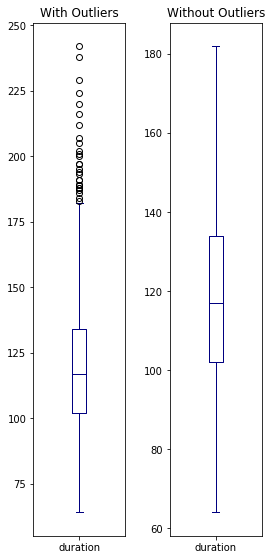

In [8]:
plt.subplot(1,2,1)
plt.title('With Outliers')
movies.duration.plot.box(figsize = (4,8), color = 'navy', showfliers = True)
plt.subplot(1,2,2)
plt.title('Without Outliers')
movies.duration.plot.box(figsize = (4,8), color = 'navy', showfliers = False)
plt.tight_layout(pad = 1.5) # Formats spacing

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
movies.groupby('content_rating').count().title

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

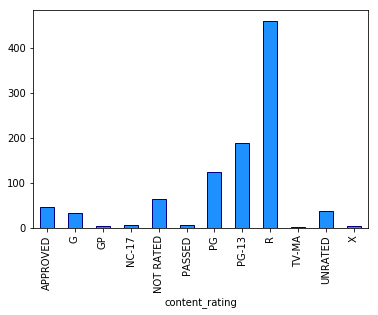

In [10]:
movies.groupby('content_rating').count().title.plot.bar(color = 'dodgerblue', edgecolor = 'navy')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

/Users/abhinavjha11/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


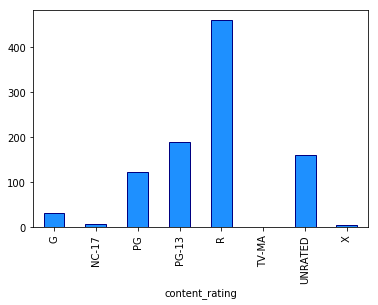

In [11]:
for i in range(len(movies.content_rating)):
    if movies.content_rating[i] in {'NOT RATED', 'APPROVED','PASSED','GP'}:
        movies['content_rating'][i] = 'UNRATED'
    

movies.groupby('content_rating').count().title.plot.bar(color = 'dodgerblue', edgecolor = 'navy')

#### Convert the following content ratings to "NC-17": X, TV-MA.

/Users/abhinavjha11/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


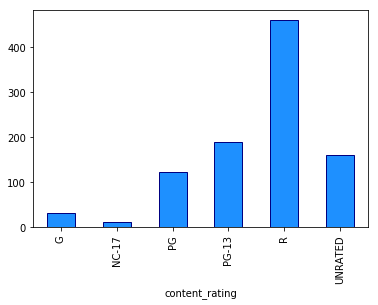

In [12]:
for i in range(len(movies.content_rating)):
    if movies.content_rating[i] in {'TV-MA','X'}:
        movies['content_rating'][i] = 'NC-17'
    

movies.groupby('content_rating').count().title.plot.bar(color = 'dodgerblue', edgecolor = 'navy')

#### Count the number of missing values in each column.

In [13]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
movies1 = movies[movies.isnull().any(axis=1)] # examines the data containing missing values
# The data shows that the content rating is missing for 3 rows



In [15]:
# The following code replaces the content rating to the most common content rating of its genre:
for i in movies1.index:
    replaceRating = movies.loc[movies['genre'] == movies.genre[i]].content_rating.describe().top
    movies.content_rating[i] = replaceRating

/Users/abhinavjha11/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
#  Prints the same window so content rating replacements can be seen.
movies.iloc[movies1.index]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,R,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,R,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [17]:
# Proves no more rows in any columns are null.
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [18]:
averageRating_longer = movies.loc[movies['duration'] >= 120].star_rating.mean()
averageRating_shorter = movies.loc[movies['duration'] <= 120].star_rating.mean()

print('Average Rating of Movies 2 hours or longer is ' + str(averageRating_longer))
print('Average Rating of Movies less than 2 hours is ' + str(averageRating_shorter))


Average Rating of Movies 2 hours or longer is 7.948898678414082
Average Rating of Movies less than 2 hours is 7.8384898710865345


#### Use a visualization to detect whether there is a relationship between duration and star rating.

A correlation is unlikely since the r value is 0.22714918343059193


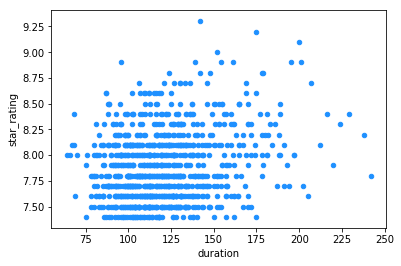

In [19]:
movies.plot(kind='scatter', x='duration', y='star_rating', color = 'dodgerblue')

if movies['duration'].corr(movies['star_rating']) > 0.5:
    print('A correlation is likely since the r value is ' + str(movies['duration'].corr(movies['star_rating'])))
else:
    print('A correlation is unlikely since the r value is ' + str(movies['duration'].corr(movies['star_rating'])))

#### Calculate the average duration for each genre.

In [20]:
# Prints results to a pandas data frame: 
movies_genreAvgDuration = pd.DataFrame(columns =['Genre', 'Average_Duration'])

for i in movies.genre.unique():   
    movies_genreAvgDuration = movies_genreAvgDuration.append([{'Genre': i, 'Average_Duration': movies.loc[movies['genre'] == i].duration.mean()}], ignore_index=True)
    
# Prints data frame output:
movies_genreAvgDuration

,Genre,Average_Duration
0,Crime,122.298387
1,Action,126.485294
2,Drama,126.539568
3,Western,136.666667
4,Adventure,134.840000
5,Biography,131.844156
6,Comedy,107.602564
7,Animation,96.596774
8,Mystery,115.625000
9,Horror,102.517241


## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111e4be48>,
      dtype=object)

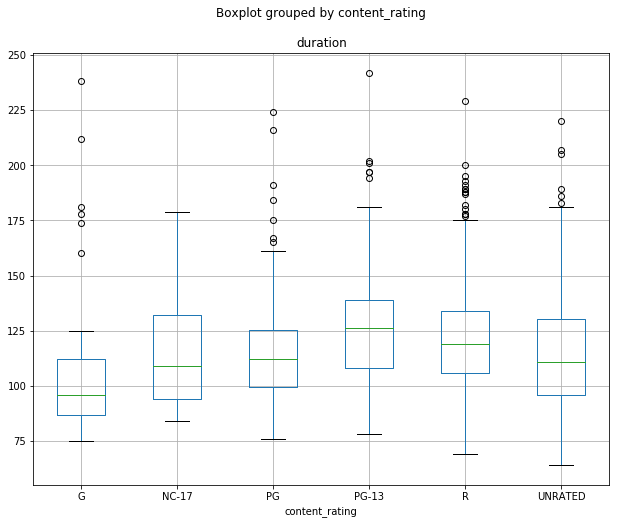

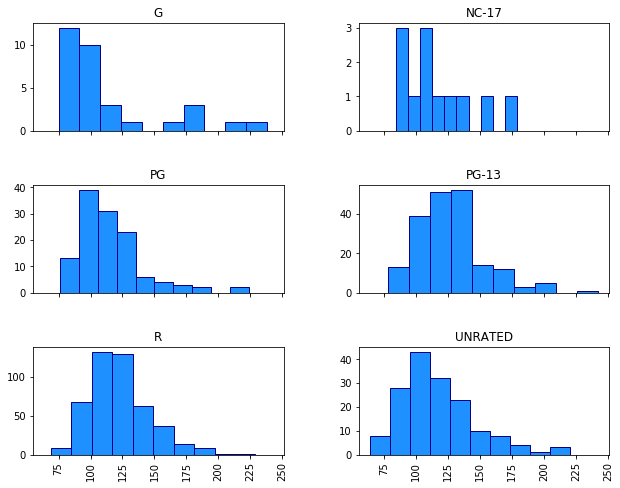

In [21]:
movies.boxplot(column='duration', by='content_rating', figsize = (10,8))
movies.hist(column='duration', by='content_rating', sharex=True, figsize = (10,8), color = 'dodgerblue', edgecolor = 'navy')

#### Determine the top rated movie (by star rating) for each genre.

In [22]:
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [23]:
dupe_titles = movies[movies.title.duplicated(keep=False)]
dupe_titles
# The data frame below shows that the duplicated titles are not acutally duplicates since the actors lists are different

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [24]:
genreCount = movies.groupby('genre').count().title
genreCount >= 10

rel_genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery']
movies[movies.genre.isin(rel_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [25]:
rel_genres = movies.genre.value_counts()
rel_genres = rel_genres[rel_genres >=10].index
movies[movies.genre.isin(rel_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [26]:
boolean_filter = movies.groupby('genre').count().title >= 10
movies.groupby('genre').star_rating.mean()[boolean_filter]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [27]:
countMean_agg= movies.groupby('genre').star_rating.agg(['count', 'mean'])
countMean_agg[countMean_agg['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [28]:
import unicodedata

In [29]:
# This code only needs to run once, IGNORE ERROR MESSAGE.
# The For Loop Below Takes 50s to Run. It converts all the actors lists from Unicode Files to Lists
movies1 = movies
for i in range(len(movies1)):
    movies1.actors_list[i] = eval(movies1.actors_list[i])

/Users/abhinavjha11/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [54]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def actor_details(name):
    newdf = pd.DataFrame(columns = movies1.columns)
    for i in range(len(movies1)):
        if name in movies1.actors_list[i]:
            newdf = newdf.append(movies1.iloc[[i]], ignore_index = True);
    print('\033[1m' + '\033[4m'+ 'Analysis - ' + name + ' (' + str(len(newdf)) + ' Movies in Database):' + '\033[0m')
    print('Average IMDB Rating: ' + '\033[94m' + str(round(newdf.star_rating.mean(),2)) + '\033[0m')
    print('Top Rated Movie: ' + '\033[94m' + newdf.sort_values('star_rating', ascending=False).title[0] + '\033[0m' + '  at ' + '\033[94m' + str(newdf.sort_values('star_rating', ascending=False).star_rating[0]) + '\033[0m')
    print('Most Successful Genre: ' + '\033[94m' + newdf.groupby('genre').star_rating.mean().sort_values(ascending=False).index[0] + '\033[0m')
    print('Average Duration of ' + name + '\'s Movies: ' + '\033[94m'  + str(int(round(newdf.duration.mean()))) + ' minutes' + '\033[0m')
    print('Top Content Rating: ' + '\033[94m' + newdf.groupby('content_rating').count().title.sort_values(ascending=False).index[0] + '\033[0m')
    dat = pd.DataFrame(columns = ['act_name'])
    for i in newdf.actors_list:
        dat = dat.append(i, ignore_index = True)      
    dat.columns = ['None', 'act_name']
    del dat['None']
    dat['counter'] = 'a'
    dat1 = dat.groupby(['act_name'])
    dat2 = pd.DataFrame(dat1.size().reset_index(name = "group_count"))
    dat2 = dat2.sort_values('group_count', ascending = False)
    ms_actor = dat2.reset_index(drop=True).act_name[1]
    print('Co-star Most Worked With: ' + '\033[94m'  + ms_actor + '\033[0m')
    plt.figure(figsize = (8,2.5))
    plt.title('Movie Genres Acted In')
    plt.bar(newdf.groupby('genre').title.count().index, newdf.groupby('genre').title.count(), color = 'dodgerblue', edgecolor = 'navy')
    plt.figure(figsize = (8,2.5))
    plt.title('Content Ratings Acted In')
    plt.bar(newdf.groupby('content_rating').title.count().index, newdf.groupby('content_rating').title.count(), color = 'dodgerblue', edgecolor = 'navy')
    return newdf

Analysis - Brad Pitt (14 Movies in Database):
Average IMDB Rating: 7.92
Top Rated Movie: Fight Club  at 8.9
Most Successful Genre: Comedy
Average Duration of Brad Pitt's Movies: 136 minutes
Top Content Rating: R
Co-star Most Worked With: Cate Blanchett


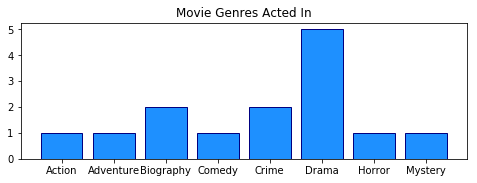

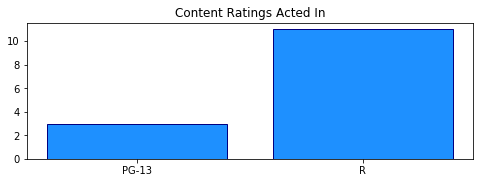

In [55]:
A = actor_details('Brad Pitt')

In [32]:
# List of Actors and their corresponding number of IMDB appearences to help search for Actors above:

dat = pd.DataFrame(columns = ['act_name'])
for i in movies1.actors_list:
    dat = dat.append(i, ignore_index = True)
        
dat.columns = ['None', 'act_name']
del dat['None']
dat['counter'] = 'a'
dat1 = dat.groupby(['act_name'])
dat2 = pd.DataFrame(dat1.size().reset_index(name = "group_count"))
dat2 = dat2.sort_values('group_count', ascending = False)
dat2.reset_index(drop=True)
dat2.columns = ['Actor Name', 'IMDB Appearences']
dat2.set_index('Actor Name', inplace=True)
list_of_actor_apprearences = dat2
list_of_actor_apprearences.head()

,IMDB Appearences
Actor Name,
Robert De Niro,18
Brad Pitt,14
Clint Eastwood,14
Tom Hanks,14
Al Pacino,13


In [33]:
# END OF BONUS QUESTION